In [42]:
import joblib
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from pickle import load

In [43]:
model = load_model('/content/best_model.h5') # 인공지능 모델 불러오기
scaler = load(open('/content/rbs_scaler.pkl', 'rb'))
data = pd.read_csv('/content/test_data.csv', index_col=0) # 테스트 데이터 불러오기

In [44]:
data_scaled = scaler.transform(data)

In [45]:
y_pred = list(model.predict(data_scaled))
external_pm25 = list(data['external_PM25'])

for i,y in zip(range(len(y_pred)), y_pred):
  if y < 0:
    y_pred[i] = 0
  y_pred[i] = np.round(y_pred[i], 2)

print(y_pred)

240/240 [==============================] - 0s 1ms/step
[array([0.14], dtype=float32), array([5.54], dtype=float32), array([0.83], dtype=float32), array([0.58], dtype=float32), array([3.23], dtype=float32), array([1.7], dtype=float32), array([2.25], dtype=float32), array([0.92], dtype=float32), array([3.82], dtype=float32), array([0.52], dtype=float32), array([3.9], dtype=float32), array([6.67], dtype=float32), array([3.98], dtype=float32), array([1.85], dtype=float32), array([3.84], dtype=float32), array([0.99], dtype=float32), array([7.01], dtype=float32), array([1.7], dtype=float32), array([6.84], dtype=float32), array([4.11], dtype=float32), array([1.55], dtype=float32), array([1.62], dtype=float32), array([2.86], dtype=float32), array([1.14], dtype=float32), array([1.5], dtype=float32), array([6.72], dtype=float32), array([6.82], dtype=float32), array([4.91], dtype=float32), array([5.44], dtype=float32), array([0.69], dtype=float32), array([3.33], dtype=float32), array([3.66], dtyp

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


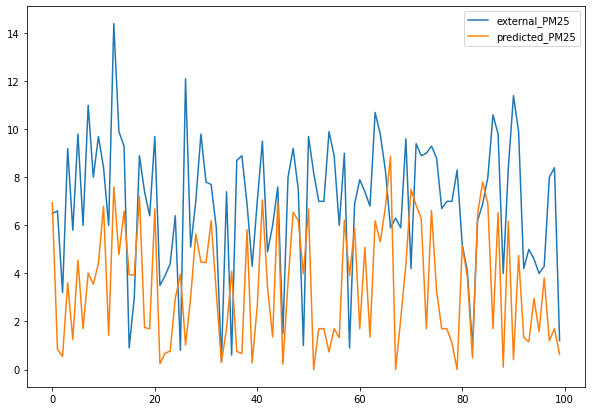


실외 초미세먼지 수치는 [1.2] 입니다.
실내 초미세먼지 예측치는 [0.63] 입니다.


In [46]:
plt.figure(figsize=(10,7))

plt.plot(external_pm25[-100:], label='external_PM25')
plt.plot(y_pred[-100:], label='predicted_PM25')

plt.legend()
plt.show()

# 데이터 중 실외 미세먼지 수치, 실내 미세먼지 예측치의 최신값을 가져와 출력합니다
print('\n실외 초미세먼지 수치는 [{}] 입니다.'.format(external_pm25[-1]))
print('실내 초미세먼지 예측치는 {} 입니다.'.format(y_pred[-1]))